# Importando as bibliotecas

In [1]:
!pip install pandas
!pip install numpy
!pip install numexpr

In [4]:
#Importando bibliotecas
import pandas as pd
import pandas_profiling
import numpy as np
import datetime
import numpy
import numexpr

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimensionamento de dados
from sklearn.preprocessing import scale

# Clusterização KMeans
from sklearn.cluster import KMeans

# Para análise de cesta (Apriori)
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Lendo a Avaliando os dados de compra

In [5]:
# Lendo os dados
df = pd.read_csv('C:\\users\\tabuq\\Projeto Final\\dataset\\base_varejo.csv', delimiter=',', parse_dates=['dat_compra'], 
                 dtype={'cod_transacao': int, 'cod_pessoa': int, 'cod_loja': int, 'cod_produto': int, 
                        'des_produto': str, 'vlr_item_compra' : float, 'qtd_item_compra' : float})

In [6]:
# Avaliando os dados
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649885 entries, 0 to 9649884
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   cod_transacao    int32         
 1   cod_pessoa       int32         
 2   dat_compra       datetime64[ns]
 3   cod_loja         int32         
 4   des_produto      object        
 5   cod_produto      int32         
 6   vlr_item_compra  float64       
 7   qtd_item_compra  float64       
dtypes: datetime64[ns](1), float64(2), int32(4), object(1)
memory usage: 441.7+ MB


In [7]:
# Avaliando os dados
df.head(5)

,cod_transacao,cod_pessoa,dat_compra,cod_loja,des_produto,cod_produto,vlr_item_compra,qtd_item_compra
0,6504312,11498,2020-01-02 07:11:03,1,CAR SUI LOMBO KG,465436288,19.49,1.000
1,6504312,11498,2020-01-02 07:11:03,1,MORT PERD BOLOGNELA KG,1359334784,16.91,0.304
2,6504312,11498,2020-01-02 07:11:03,1,CAR BOV COXAO MOLE KG,1147333120,27.98,1.088
3,6504312,11498,2020-01-02 07:11:03,1,PAO FRANCES M BEM+ KG,440312192,9.89,0.470
4,6504312,11498,2020-01-02 07:11:03,1,CAR AVE COXINHA ASA KG,1037206016,14.98,1.016


In [8]:
# Avaliando os dados
df.tail(5)

,cod_transacao,cod_pessoa,dat_compra,cod_loja,des_produto,cod_produto,vlr_item_compra,qtd_item_compra
9649880,7152988,83195,2020-06-30 21:17:17,2,"GUARDANAPO MILI 30X29,50",1955104044,3.09,1.0
9649881,7152988,83195,2020-06-30 21:17:17,2,LEITE LIDER INT 1L,1875452341,3.59,12.0
9649882,7152988,83195,2020-06-30 21:17:17,2,CAFE SABORIAL EXTFORT 5,1633657302,5.99,1.0
9649883,7152988,83195,2020-06-30 21:17:17,2,ACUCAR SANTA ISABEL CRIS,257027323,4.19,1.0
9649884,7152988,83195,2020-06-30 21:17:17,2,RACAO BEAUTYPET CARNE 6K,861168913,27.90,1.0


# Construindo as dimensões RFM e clusterizando os clientes a partir delas

Para essa base de varejo avaliarei o perfil de clientes e compras feitas por eles ao longo dos ultimos 6 meses.

Como abordagem para a segmentação dos clientes, foi escolhida a segmentação usando as dimensões de Recência, Frequência e Valor monetário, o RFM. 

A análise RFM permite uma comparação entre clientes potenciais. Dá uma noção de quanta receita vem de clientes recorrentes (em comparação com novos clientes) e quais alavancas podem ser usadas para tentar deixar os clientes mais felizes, de modo que se tornem compradores recorrentes, fiéis e/ou com maior valor monetário.

Por que o modelo de recência, frequência, valor monetário (RFM) é útil?
O modelo (RFM) é baseado em três fatores quantitativos, ou seja, recência, frequência e valor monetário. Cada cliente é agrupado segundo a distribuição dessas categorias.

O que é tempo para retorno?
O fator de recência é baseado na noção de que quanto mais recentemente um cliente fez uma compra com uma empresa, maior a probabilidade de ele continuar a manter o negócio e a marca em mente para as compras subsequentes. Essas informações podem ser usadas para lembrar os clientes recentes de revisitar o negócio em breve para continuar atendendo às suas necessidades de compra.

O que é frequência?
A frequência das transações de um cliente pode ser afetada por fatores como o tipo de produto, o preço da compra e a necessidade de reposição ou substituição. Prever isso pode ajudar nos esforços de marketing direcionados a lembrar o cliente de visitar a empresa novamente.

O que é valor monetário?
O valor monetário decorre de quanto o cliente gasta. Uma inclinação natural é dar mais ênfase ao incentivo aos clientes que gastam mais dinheiro a continuar a fazê-lo. Embora isso possa produzir um melhor retorno sobre o investimento em marketing e atendimento ao cliente, também corre o risco de alienar clientes que têm sido consistentes, mas não gastam tanto em cada transação.


In [9]:
# Calculando o valor total por item, multiplicando o preço unitário pela quantidade comprada, e salvando 
# como variável vlr_total_item

vlr_total_item = pd.DataFrame(df.vlr_item_compra * df.qtd_item_compra, columns = ["vlr_total_item"])
vlr_total_item.head()

,vlr_total_item
0,19.49000
1,5.14064
2,30.44224
3,4.64830
4,15.21968


In [10]:
#Mesclando vlr_total_item com df
df = pd.concat(objs = [df, vlr_total_item], axis = 1, ignore_index = False)

In [11]:
df.head(5)

,cod_transacao,cod_pessoa,dat_compra,cod_loja,des_produto,cod_produto,vlr_item_compra,qtd_item_compra,vlr_total_item
0,6504312,11498,2020-01-02 07:11:03,1,CAR SUI LOMBO KG,465436288,19.49,1.000,19.49000
1,6504312,11498,2020-01-02 07:11:03,1,MORT PERD BOLOGNELA KG,1359334784,16.91,0.304,5.14064
2,6504312,11498,2020-01-02 07:11:03,1,CAR BOV COXAO MOLE KG,1147333120,27.98,1.088,30.44224
3,6504312,11498,2020-01-02 07:11:03,1,PAO FRANCES M BEM+ KG,440312192,9.89,0.470,4.64830
4,6504312,11498,2020-01-02 07:11:03,1,CAR AVE COXINHA ASA KG,1037206016,14.98,1.016,15.21968


In [12]:
# Calculando o ticket total para cada transação
ticket = df.groupby(['cod_transacao','cod_pessoa']).vlr_total_item.sum()
ticket = ticket.reset_index()
ticket.head()

,cod_transacao,cod_pessoa,vlr_total_item
0,6504312,11498,94.92086
1,6504313,8935,24.82225
2,6504314,377,25.84310
3,6504315,4825,284.71602
4,6504316,20968,24.42653


In [13]:
# Calculando o ticket médio para cada cliente
ticket_medio = ticket.groupby('cod_pessoa').vlr_total_item.mean()
ticket_medio = ticket_medio.reset_index()
ticket_medio.head()

,cod_pessoa,vlr_total_item
0,3,58.681167
1,4,324.944300
2,6,137.907768
3,7,157.908169
4,9,104.243913


In [14]:
# Criando as dimensões de ano e mês
df['dat_compra_ano'] = df['dat_compra'].dt.year 
df['dat_compra_mes'] = df['dat_compra'].dt.month
df.head(5)

,cod_transacao,cod_pessoa,dat_compra,cod_loja,des_produto,cod_produto,vlr_item_compra,qtd_item_compra,vlr_total_item,dat_compra_ano,dat_compra_mes
0,6504312,11498,2020-01-02 07:11:03,1,CAR SUI LOMBO KG,465436288,19.49,1.000,19.49000,2020,1
1,6504312,11498,2020-01-02 07:11:03,1,MORT PERD BOLOGNELA KG,1359334784,16.91,0.304,5.14064,2020,1
2,6504312,11498,2020-01-02 07:11:03,1,CAR BOV COXAO MOLE KG,1147333120,27.98,1.088,30.44224,2020,1
3,6504312,11498,2020-01-02 07:11:03,1,PAO FRANCES M BEM+ KG,440312192,9.89,0.470,4.64830,2020,1
4,6504312,11498,2020-01-02 07:11:03,1,CAR AVE COXINHA ASA KG,1037206016,14.98,1.016,15.21968,2020,1


In [15]:
# Calculando a frequência mensal por cliente através da contagem de transações (= evento compra) dos clientes por mês
frequencia = df[['cod_pessoa', 'cod_transacao', 'dat_compra_ano', 'dat_compra_mes']]
frequencia = frequencia.drop_duplicates()
k = frequencia.groupby(['cod_pessoa', 'dat_compra_ano', 'dat_compra_mes']).cod_transacao.count()
freq_mensal = pd.DataFrame(k)
freq_mensal = k.reset_index()
freq_mensal.columns = ['cod_pessoa', 'dat_compra_ano', 'dat_compra_mes', 'freq_mensal']
freq_mensal.head()

,cod_pessoa,dat_compra_ano,dat_compra_mes,freq_mensal
0,3,2020,3,1
1,3,2020,6,2
2,4,2020,1,2
3,4,2020,5,1
4,6,2020,1,3


In [16]:
# Calculando a frequência mensal média por cliente
freq_mensal_media = freq_mensal.groupby('cod_pessoa').freq_mensal.mean()
freq_mensal_media = freq_mensal_media.reset_index()
freq_mensal_media.head()

,cod_pessoa,freq_mensal
0,3,1.5
1,4,1.5
2,6,4.0
3,7,1.4
4,9,7.0


In [17]:
# Mesclando Frequencia Mensal Média e Ticket Médio
FM_df = ticket_medio.merge(freq_mensal_media, on = "cod_pessoa", how = "inner")
FM_df.head()

,cod_pessoa,vlr_total_item,freq_mensal
0,3,58.681167,1.5
1,4,324.944300,1.5
2,6,137.907768,4.0
3,7,157.908169,1.4
4,9,104.243913,7.0


In [18]:
# Calculando a recência por cliente
base_recencia = df[['cod_pessoa', 'dat_compra']]
base_recencia = base_recencia.drop_duplicates()
base_recencia.head(10)

,cod_pessoa,dat_compra
0,11498,2020-01-02 07:11:03
6,8935,2020-01-02 07:12:36
14,4825,2020-01-02 07:12:40
20,377,2020-01-02 07:12:45
28,20968,2020-01-02 07:14:39
35,71095,2020-01-02 07:16:54
38,63987,2020-01-02 07:19:05
46,15944,2020-01-02 07:19:32
48,39828,2020-01-02 07:21:46
51,9981,2020-01-02 07:24:38


In [19]:
# Calculando a data mais recente
maxima_data = max(base_recencia.dat_compra)
maxima_data

Timestamp('2020-06-30 21:17:17')

In [20]:
# Calculando a diferença para a data mais recente de compra
base_recencia['dif_maxima_data'] = maxima_data - base_recencia.dat_compra
base_recencia.head()

,cod_pessoa,dat_compra,dif_maxima_data
0,11498,2020-01-02 07:11:03,180 days 14:06:14
6,8935,2020-01-02 07:12:36,180 days 14:04:41
14,4825,2020-01-02 07:12:40,180 days 14:04:37
20,377,2020-01-02 07:12:45,180 days 14:04:32
28,20968,2020-01-02 07:14:39,180 days 14:02:38


In [21]:
# Calculando a recencia (menor diferença para a data máxima) entre clientes
recencia = base_recencia.groupby('cod_pessoa').dif_maxima_data.min()
recencia = recencia.reset_index()
recencia = recencia.rename(columns = {'dif_maxima_data': 'recencia'}, inplace = False)
recencia.head()

,cod_pessoa,recencia
0,3,21 days 04:21:10
1,4,52 days 07:18:34
2,6,41 days 01:42:00
3,7,15 days 01:14:16
4,9,5 days 06:49:54


In [22]:
# Criando o Dataframe de RFM (Recência, Frequência e Ticket)
RFM_df = FM_df.merge(recencia, on = "cod_pessoa")
RFM_df = RFM_df.rename(columns = {'vlr_total_item': 'ticket', 'freq_mensal': 'frequencia'}, inplace = False)
RFM_df.head()

,cod_pessoa,ticket,frequencia,recencia
0,3,58.681167,1.5,21 days 04:21:10
1,4,324.944300,1.5,52 days 07:18:34
2,6,137.907768,4.0,41 days 01:42:00
3,7,157.908169,1.4,15 days 01:14:16
4,9,104.243913,7.0,5 days 06:49:54


# Preparando os dados RFM para Clusterização

In [23]:
# Normalizando os parâmetros
RFM_norm = RFM_df.drop(["cod_pessoa"], axis=1)
RFM_norm.recencia = RFM_norm.recencia.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm = standard_scaler.fit_transform(RFM_norm)

RFM_norm = pd.DataFrame(RFM_norm)
RFM_norm.columns = ['ticket','frequencia','recencia']
RFM_norm.head()

D:\tabuq\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\tabuq\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,ticket,frequencia,recencia
0,-0.532752,-0.570242,-0.269124
1,1.351359,-0.570242,0.466432
2,0.027865,0.508119,0.205428
3,0.169390,-0.613376,-0.411489
4,-0.210345,1.802153,-0.648765


# Estatísticas de Hopkins:

A estatística de Hopkins é uma estatística que fornece um valor que indica a tendência do cluster, em outras palavras: quão bem os dados podem ser agrupados.

Se o valor estiver entre {0,01, ..., 0,3}, os dados são espaçados regularmente.

Se o valor estiver em torno de 0,5, é aleatório.

Se o valor estiver entre {0,7, ..., 0,99}, ele tem uma alta tendência de se agrupar.

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(RFM_norm)

0.9957786988422154

# Método do joelho (Elbow)

O método Elbow é uma técnica muito popular e a ideia é executar o agrupamento de k-means para uma gama de clusters k (digamos de 1 a 10) e para cada valor, estamos calculando a soma das distâncias quadradas de cada ponto ao seu centro atribuído (distorções).

Quando as distorções são plotadas, o gráfico parece um braço, o “cotovelo” (o ponto de inflexão na curva) é o melhor valor de k.

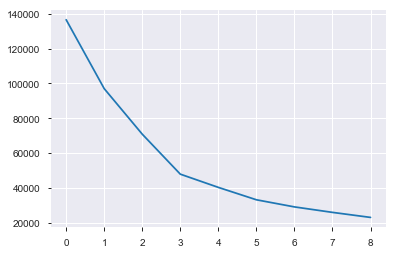

In [26]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm)
    ssd.append(model_clus.inertia_)
plt.plot(ssd)

Pelo método do joelho, visualmente parece ser 3 o número de clusters mais adequado

# Análise da silhueta (Silhouette Analysis)

A pontuação da silhueta para um conjunto de pontos de dados de amostra é usada para medir o quão densos e bem separados os clusters são. Essa pontuação leva em consideração a distância intra-cluster entre a amostra e outros pontos de dados dentro do mesmo cluster (a) e a distância inter-cluster entre a amostra e o próximo cluster mais próximo (b). A pontuação da silhueta está dentro do intervalo [-1, 1]. A pontuação da silhueta de 1 significa que os aglomerados são muito densos e bem separados. A pontuação de 0 significa que os clusters estão sobrepostos. A pontuação menor que 0 significa que os dados pertencentes a clusters podem estar errados / incorretos. Os gráficos de silhueta podem ser usados para selecionar o valor ideal do K (número do cluster) no agrupamento K-means. Os aspectos a serem observados nos gráficos de silhueta são pontuações de cluster abaixo da pontuação média da silhueta, grandes flutuações no tamanho dos clusters e também a espessura do gráfico de silhueta.

D:\tabuq\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\tabuq\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\tabuq\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


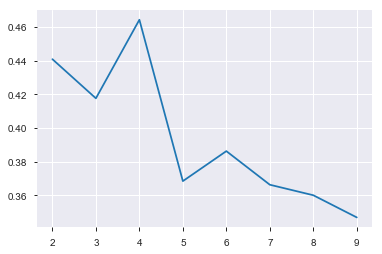

In [27]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm)
    sse_.append([k, silhouette_score(RFM_norm, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

O melhor score da análise de silhueta foi 4, portanto usaremos 4 como o número ótimo de clusters

In [28]:
# Aplicando o Kmeans para K=4, melhor silhouette score
model_clus4 = KMeans(n_clusters =4, max_iter=50)
model_clus4.fit(RFM_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
# Criando o dataframe de do RFM clusterizado por k-means
RFM_km_df = pd.concat([RFM_df, pd.Series(model_clus4.labels_)], axis=1)
RFM_km_df.columns = ['cod_pessoa', 'ticket', 'frequencia', 'recencia', 'ClusterID']

RFM_km_df.recencia = RFM_km_df.recencia.dt.days
km_clusters_ticket = pd.DataFrame(RFM_km_df.groupby(["ClusterID"]).ticket.mean())
km_clusters_frequencia = pd.DataFrame(RFM_km_df.groupby(["ClusterID"]).frequencia.mean())
km_clusters_recencia = pd.DataFrame(RFM_km_df.groupby(["ClusterID"]).recencia.mean())

RFM_km_df.head(20)

,cod_pessoa,ticket,frequencia,recencia,ClusterID
0,3,58.681167,1.500000,21,0
1,4,324.944300,1.500000,52,1
2,6,137.907768,4.000000,41,0
3,7,157.908169,1.400000,15,0
4,9,104.243913,7.000000,5,2
5,10,129.010380,1.000000,40,0
6,11,152.954400,1.000000,4,0
7,12,78.600620,1.666667,15,0
8,13,137.411172,7.833333,0,2
9,14,82.226960,5.000000,1,2


In [30]:
#droppando células NaN e alterando cod_pessoa e ClusterID para inteiro
RFM_km_df = RFM_km_df.dropna()
RFM_km_df.cod_pessoa = pd.to_numeric(RFM_km_df.cod_pessoa, downcast="integer", errors="ignore")
RFM_km_df.ClusterID = pd.to_numeric(RFM_km_df.ClusterID, downcast="integer", errors="ignore")

RFM_km_df.head(20)

,cod_pessoa,ticket,frequencia,recencia,ClusterID
0,3,58.681167,1.500000,21,0
1,4,324.944300,1.500000,52,1
2,6,137.907768,4.000000,41,0
3,7,157.908169,1.400000,15,0
4,9,104.243913,7.000000,5,2
5,10,129.010380,1.000000,40,0
6,11,152.954400,1.000000,4,0
7,12,78.600620,1.666667,15,0
8,13,137.411172,7.833333,0,2
9,14,82.226960,5.000000,1,2


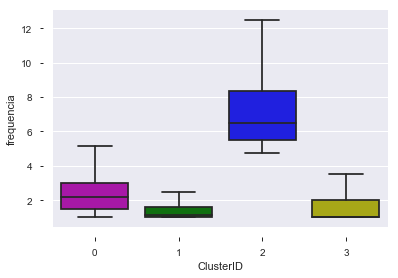

In [32]:
# Analisando os clusters gerados - Frequência
sns.boxplot(x="ClusterID", y="frequencia", palette=["m", "g", "b", "y"], data=RFM_km_df, showfliers = False)
sns.despine(offset=10, trim=True)

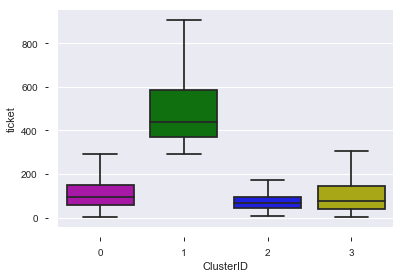

In [33]:
# Analisando os clusters gerados - Ticket
sns.boxplot(x="ClusterID", y="ticket", palette=["m", "g", "b", "y"], data=RFM_km_df, showfliers = False)
sns.despine(offset=10, trim=True)

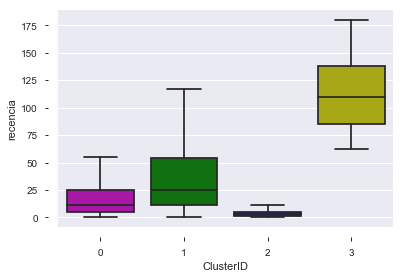

In [34]:
# Analisando os clusters gerados - Recência
sns.boxplot(x="ClusterID", y="recencia", palette=["m", "g", "b", "y"], data=RFM_km_df, showfliers = False)
sns.despine(offset=10, trim=True)

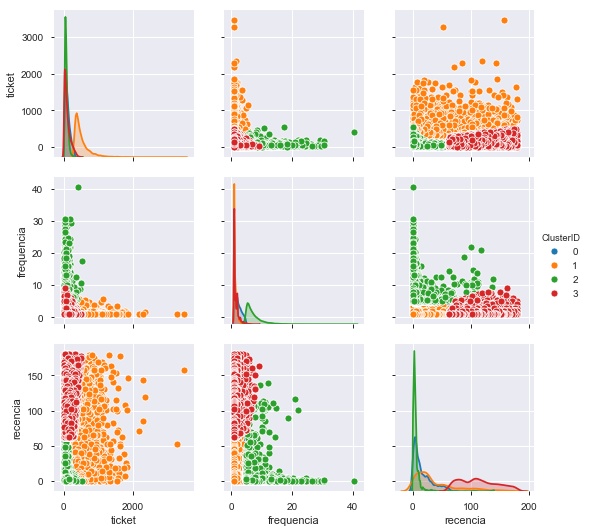

In [49]:
sns.pairplot(data=RFM_km_df, x_vars=['ticket', 'frequencia', 'recencia'], y_vars=['ticket', 'frequencia', 'recencia'], hue='ClusterID')

In [50]:
df.head(10)

,cod_transacao,cod_pessoa,dat_compra,cod_loja,des_produto,cod_produto,vlr_item_compra,qtd_item_compra,vlr_total_item,dat_compra_ano,dat_compra_mes
0,6504312,11498,2020-01-02 07:11:03,1,CAR SUI LOMBO KG,465436288,19.49,1.000,19.49000,2020,1
1,6504312,11498,2020-01-02 07:11:03,1,MORT PERD BOLOGNELA KG,1359334784,16.91,0.304,5.14064,2020,1
2,6504312,11498,2020-01-02 07:11:03,1,CAR BOV COXAO MOLE KG,1147333120,27.98,1.088,30.44224,2020,1
3,6504312,11498,2020-01-02 07:11:03,1,PAO FRANCES M BEM+ KG,440312192,9.89,0.470,4.64830,2020,1
4,6504312,11498,2020-01-02 07:11:03,1,CAR AVE COXINHA ASA KG,1037206016,14.98,1.016,15.21968,2020,1
5,6504312,11498,2020-01-02 07:11:03,1,BATATA COOLMIND CONG TRA,929272506,19.98,1.000,19.98000,2020,1
6,6504313,8935,2020-01-02 07:12:36,1,FRUTAS MANGA TOMMY ATKIN,104694528,1.98,0.810,1.60380,2020,1
7,6504313,8935,2020-01-02 07:12:36,1,FRUTAS PESSEGO NAC KG,431123072,5.98,0.560,3.34880,2020,1
8,6504313,8935,2020-01-02 07:12:36,1,PAO FRANCES M BEM+ KG,440312192,9.91,0.115,1.13965,2020,1
9,6504313,8935,2020-01-02 07:12:36,1,BISC TUC S TRADICIONAL 1,1911410629,1.29,1.000,1.29000,2020,1


In [51]:
# Mesclando as informações de cluster ao Dataframe
df_RFM = pd.merge(df, RFM_km_df, on="cod_pessoa")
df_RFM.head(10)

,cod_transacao,cod_pessoa,dat_compra,cod_loja,des_produto,cod_produto,vlr_item_compra,qtd_item_compra,vlr_total_item,dat_compra_ano,dat_compra_mes,ticket,frequencia,recencia,ClusterID
0,6504312,11498,2020-01-02 07:11:03,1,CAR SUI LOMBO KG,465436288,19.49,1.000,19.49000,2020,1,156.162137,4.8,44,0
1,6504312,11498,2020-01-02 07:11:03,1,MORT PERD BOLOGNELA KG,1359334784,16.91,0.304,5.14064,2020,1,156.162137,4.8,44,0
2,6504312,11498,2020-01-02 07:11:03,1,CAR BOV COXAO MOLE KG,1147333120,27.98,1.088,30.44224,2020,1,156.162137,4.8,44,0
3,6504312,11498,2020-01-02 07:11:03,1,PAO FRANCES M BEM+ KG,440312192,9.89,0.470,4.64830,2020,1,156.162137,4.8,44,0
4,6504312,11498,2020-01-02 07:11:03,1,CAR AVE COXINHA ASA KG,1037206016,14.98,1.016,15.21968,2020,1,156.162137,4.8,44,0
5,6504312,11498,2020-01-02 07:11:03,1,BATATA COOLMIND CONG TRA,929272506,19.98,1.000,19.98000,2020,1,156.162137,4.8,44,0
6,6518366,11498,2020-01-05 09:50:46,2,FRUTAS LIMAO TAITI KG,1590272768,1.40,0.630,0.88200,2020,1,156.162137,4.8,44,0
7,6518366,11498,2020-01-05 09:50:46,2,LEG TOMATE SALADETE KG,1724105856,2.98,0.660,1.96680,2020,1,156.162137,4.8,44,0
8,6518366,11498,2020-01-05 09:50:46,2,LINGUICA BEM+ PERNIL API,1602601472,12.99,0.586,7.61214,2020,1,156.162137,4.8,44,0
9,6518366,11498,2020-01-05 09:50:46,2,LINGUICA CALABRESA AURO,403281536,17.98,0.372,6.68856,2020,1,156.162137,4.8,44,0


# Fazendo a análise de cestas compras do clusters com maior frequência

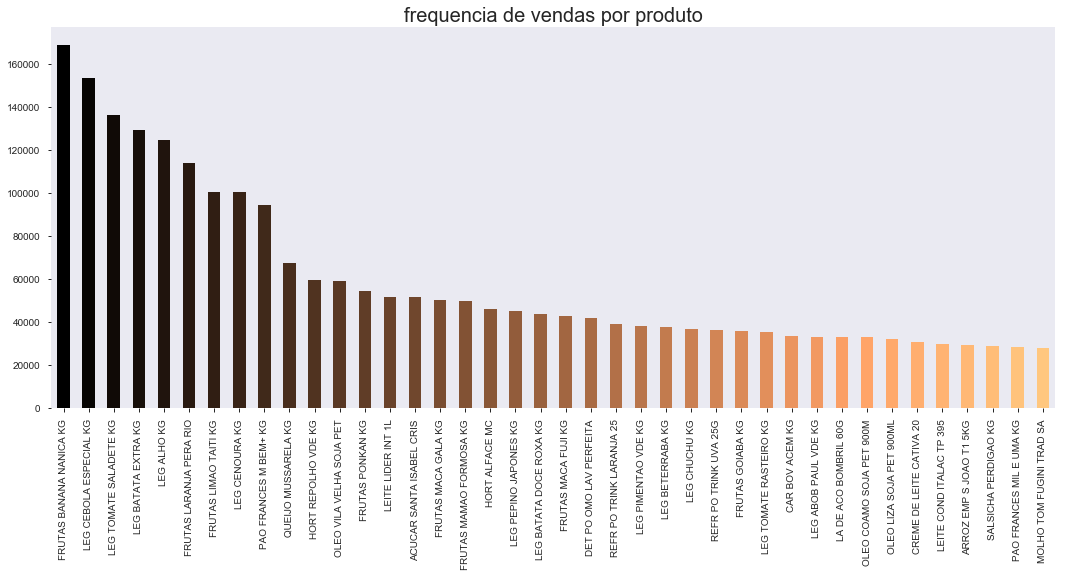

In [52]:
# Avaliando quais são os produtos mais vendidos (populares)

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['des_produto'].value_counts().head(40).plot.bar(color = color)
plt.title('frequencia de vendas por produto', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

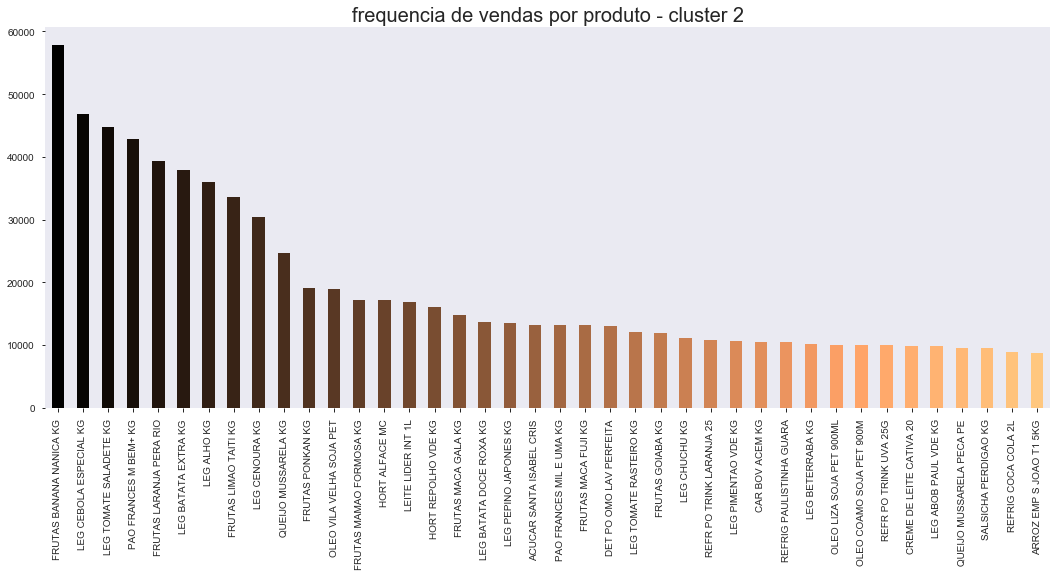

In [54]:
# Avaliando quais são os produtos mais vendidos (populares) para o cluster 2
cluster2 = df_RFM[df_RFM['ClusterID'] == 2]
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
cluster2['des_produto'].value_counts().head(40).plot.bar(color = color)
plt.title('frequencia de vendas por produto - cluster 2', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# Aplicando Apriori

Um conceito chave no algoritmo Apriori é a anti-monotonicidade (https://pt.wikipedia.org/wiki/Monotonicidade_da_implicação) da medida de suporte. Isto quer sizer que:

1 - Todos os subconjuntos de um conjunto de itens frequentes devem ser frequentes

2 - Da mesma forma, para qualquer conjunto de itens infrequentes, todos os seus superconjuntos também devem ser infrequentes

O Apriori trabalha então com o conceito de Itens frequentes, que são os Itens do seu conjunto I que têm a pontuação do Support mais que um threshold (hiper-parâmetro). Ou seja, precisamos calcular o Support de todas as combinações de Itens e extrair um subconjunto de Itens frequentes.

Os passo que serão aplicados aqui são:

Passo 1: Criar uma tabela de frequência de todos os itens que ocorrem em todas as transações.

Passo 2: Sabemos que os elementos que são significantes são aqueles cujo suporte é maior ou igual ao limite de threshold.

Passo 3: A próximo passo é formar todos os pares possíveis dos itens significativos, tendo em mente que a ordem não importa, ou seja, AB é igual a BA.

Passo 4: Contar as ocorrências de cada par em todas as transações.

Passo 5: Novamente, os conjuntos de itens significativos serão aqueles que ultrapassarem o limite de threshold.

Passoe 6: Digamos agora, que gostaríamos de procurar um conjunto de três itens que são comprados juntos. Usaremos os conjuntos de itens encontrados na passo 5 e criaremos um conjunto de 3 itens.


In [55]:
# Preparando os dados para a aplicação do Apriori
transacoes_cluster2 = cluster2.groupby(['cod_transacao', 'des_produto'])['des_produto'].count().reset_index(name ='contagem')
transacoes_cluster2.head(10)

,cod_transacao,des_produto,contagem
0,6504313,BISC TUC S TRADICIONAL 1,1
1,6504313,CAFE CABOCLO VACUO 500G,1
2,6504313,DESINF SCARLIM ROSJASMI,1
3,6504313,FRUTAS MANGA TOMMY ATKIN,1
4,6504313,FRUTAS PESSEGO NAC KG,1
5,6504313,LEITE LIDER DESNAT 1L,1
6,6504313,PAO FRANCES M BEM+ KG,1
7,6504313,REFRIG IT LIMAO PET 2L,1
8,6504315,ARROZ EMP S JOAO T1 5KG,1
9,6504315,CAR BOV CUPIM ESPECIAL K,1


In [56]:
# Separando os mais vendidos
top_transacoes_cluster2 = transacoes_cluster2.groupby(['des_produto'])['contagem'].sum().sort_values(ascending=False)
top_transacoes_cluster2.head(10)

des_produto
FRUTAS BANANA NANICA KG    57768
LEG CEBOLA ESPECIAL KG     46804
LEG TOMATE SALADETE KG     44820
PAO FRANCES M BEM+ KG      42856
FRUTAS LARANJA PERA RIO    39285
LEG BATATA EXTRA KG        37844
LEG ALHO KG                35942
FRUTAS LIMAO TAITI KG      33528
LEG CENOURA KG             30385
QUEIJO MUSSARELA KG        24730
Name: contagem, dtype: int64

In [57]:
# Lista dos 50 mais vendidos
index50_transacoes_cluster2 = top_transacoes_cluster2.index[:50]
index50_transacoes_cluster2

Index(['FRUTAS BANANA NANICA KG', 'LEG CEBOLA ESPECIAL KG',
       'LEG TOMATE SALADETE KG', 'PAO FRANCES M BEM+ KG',
       'FRUTAS LARANJA PERA RIO', 'LEG BATATA EXTRA KG', 'LEG ALHO KG',
       'FRUTAS LIMAO TAITI KG', 'LEG CENOURA KG', 'QUEIJO MUSSARELA KG',
       'FRUTAS PONKAN KG', 'OLEO VILA VELHA SOJA PET',
       'FRUTAS MAMAO FORMOSA KG', 'HORT ALFACE MC', 'LEITE LIDER INT 1L',
       'HORT REPOLHO VDE KG', 'FRUTAS MACA GALA KG', 'LEG BATATA DOCE ROXA KG',
       'LEG PEPINO JAPONES KG', 'ACUCAR SANTA ISABEL CRIS',
       'PAO FRANCES MIL E UMA KG', 'FRUTAS MACA FUJI KG',
       'DET PO OMO LAV PERFEITA', 'LEG TOMATE RASTEIRO KG', 'FRUTAS GOIABA KG',
       'LEG CHUCHU KG', 'REFR PO TRINK LARANJA 25', 'LEG PIMENTAO VDE KG',
       'CAR BOV ACEM KG', 'REFRIG PAULISTINHA GUARA', 'LEG BETERRABA KG',
       'OLEO LIZA SOJA PET 900ML', 'OLEO COAMO SOJA PET 900M',
       'REFR PO TRINK UVA 25G', 'CREME DE LEITE CATIVA 20',
       'LEG ABOB PAUL VDE KG', 'QUEIJO MUSSARELA PECA PE',

In [58]:
top50_transacoes_cluster2 = transacoes_cluster2[transacoes_cluster2.des_produto.isin(index50_transacoes_cluster2)]
top50_transacoes_cluster2.head(10)

,cod_transacao,des_produto,contagem
6,6504313,PAO FRANCES M BEM+ KG,1
8,6504315,ARROZ EMP S JOAO T1 5KG,1
13,6504315,OLEO VILA VELHA SOJA PET,1
15,6504316,LEG BATATA EXTRA KG,1
16,6504316,LEG CHUCHU KG,1
19,6504316,PAO FRANCES M BEM+ KG,1
25,6504318,LEG CHUCHU KG,1
31,6504320,FRUTAS BANANA NANICA KG,1
32,6504320,LEITE LIDER INT 1L,1
35,6504320,PAO FRANCES M BEM+ KG,1


In [59]:
# fazendo uma matriz de transação vs produtos onde cada linha representa se o item estava na transação ou não
matriz_cluster2 = top50_transacoes_cluster2.pivot_table(index='cod_transacao', columns='des_produto', values='contagem', aggfunc='sum').fillna(0)
matriz_cluster2.head()

des_produto,ACUCAR SANTA ISABEL CRIS,ARROZ EMP S JOAO T1 5KG,CAR BOV ACEM KG,CERV SKOL LT 350ML,CREME DE LEITE CATIVA 20,DET PO OMO LAV PERFEITA,FARINHA TRIGO NITA 1KG,FRUTAS BANANA NANICA KG,FRUTAS GOIABA KG,FRUTAS LARANJA PERA RIO,...,OVOS CAMPESTRE GDE BCO 1,PAO FRANCES M BEM+ KG,PAO FRANCES MIL E UMA KG,QUEIJO MUSSARELA KG,QUEIJO MUSSARELA PECA PE,REFR PO TRINK LARANJA 25,REFR PO TRINK UVA 25G,REFRIG COCA COLA 2L,REFRIG PAULISTINHA GUARA,SALSICHA PERDIGAO KG
cod_transacao,,,,,,,,,,,,,,,,,,,,,
6504313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6504315,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6504316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6504318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6504320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
matriz_cluster2.shape

(218239, 50)

In [62]:
# fazendo uma função para retornar 0 ou 1, onde 0 significa que o item não foi encontrado
# na transacao, e 1 que o item está presente, e aplicando a função a matriz

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

cesta_cluster2 = matriz_cluster2.applymap(encode)
cesta_cluster2.head()

des_produto,ACUCAR SANTA ISABEL CRIS,ARROZ EMP S JOAO T1 5KG,CAR BOV ACEM KG,CERV SKOL LT 350ML,CREME DE LEITE CATIVA 20,DET PO OMO LAV PERFEITA,FARINHA TRIGO NITA 1KG,FRUTAS BANANA NANICA KG,FRUTAS GOIABA KG,FRUTAS LARANJA PERA RIO,...,OVOS CAMPESTRE GDE BCO 1,PAO FRANCES M BEM+ KG,PAO FRANCES MIL E UMA KG,QUEIJO MUSSARELA KG,QUEIJO MUSSARELA PECA PE,REFR PO TRINK LARANJA 25,REFR PO TRINK UVA 25G,REFRIG COCA COLA 2L,REFRIG PAULISTINHA GUARA,SALSICHA PERDIGAO KG
cod_transacao,,,,,,,,,,,,,,,,,,,,,
6504313,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6504315,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6504316,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6504318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6504320,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
# Usando o 'algoritmo apriori' com um min_support=0.05 (5%).
# somente então ele será considerado como um item frequente
produto_frequente = apriori(cesta_cluster2, min_support = 0.05,use_colnames = True).sort_values(by='support', ascending=False)
produto_frequente

,support,itemsets
2,0.264701,(FRUTAS BANANA NANICA KG)
15,0.214462,(LEG CEBOLA ESPECIAL KG)
20,0.205371,(LEG TOMATE SALADETE KG)
23,0.196372,(PAO FRANCES M BEM+ KG)
4,0.179862,(FRUTAS LARANJA PERA RIO)
14,0.173406,(LEG BATATA EXTRA KG)
12,0.164691,(LEG ALHO KG)
5,0.153630,(FRUTAS LIMAO TAITI KG)
16,0.139228,(LEG CENOURA KG)
25,0.113316,(QUEIJO MUSSARELA KG)


In [65]:
# Fazendo as regras do conjunto de itens frequentes gerado acima e organizando da mais alta
# para a mais baixa Confiança (confidence)
rules = association_rules(produto_frequente, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(LEG ALHO KG),(LEG CEBOLA ESPECIAL KG),0.164691,0.214462,0.084742,0.514551,2.399264,0.049422,1.618168
5,(LEG BATATA EXTRA KG),(LEG CEBOLA ESPECIAL KG),0.173406,0.214462,0.081457,0.469744,2.190336,0.044268,1.481432
2,(FRUTAS LARANJA PERA RIO),(FRUTAS BANANA NANICA KG),0.179862,0.264701,0.082052,0.456194,1.723435,0.034443,1.352137
16,(LEG CENOURA KG),(LEG CEBOLA ESPECIAL KG),0.139228,0.214462,0.060324,0.433273,2.020277,0.030465,1.386096
18,(LEG CENOURA KG),(LEG BATATA EXTRA KG),0.139228,0.173406,0.059614,0.428172,2.469184,0.035471,1.445528
0,(LEG CEBOLA ESPECIAL KG),(LEG ALHO KG),0.214462,0.164691,0.084742,0.395137,2.399264,0.049422,1.380989
7,(LEG TOMATE SALADETE KG),(LEG CEBOLA ESPECIAL KG),0.205371,0.214462,0.079399,0.386613,1.802710,0.035355,1.280656
32,(LEG CENOURA KG),(FRUTAS BANANA NANICA KG),0.139228,0.264701,0.053528,0.384466,1.452456,0.016675,1.194572
4,(LEG CEBOLA ESPECIAL KG),(LEG BATATA EXTRA KG),0.214462,0.173406,0.081457,0.379818,2.190336,0.044268,1.332824
12,(LEG BATATA EXTRA KG),(FRUTAS BANANA NANICA KG),0.173406,0.264701,0.064993,0.374802,1.415946,0.019092,1.176106


As combinações de maior confiança seriam os "Combos" de promoção a serem feitas para os clientes do cluster 0 com provável maior resultado de relevância para esse grupo, baseado nos resultados da cesta de compra. Obviamente essa promoção poderia também aliar os interesses internos de "queima de estoque".

Desta forma essa lista poderia orientar a empresa de Marketinf Digital a promover uma campanha direcionada, não só ao cluster 0, como também a outros clusters como por exemplo, com frequência menor, motivando a compra e consequentemente promovendo o aumento da frequência.